In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix 

df =  pd.read_csv('heart.csv')

X = df.drop('output' , axis = 1)
y= df['output']

X_train, X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 ,random_state = 42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter = 2000)
model.fit(X_train , y_train)
y_pred = model.predict(X_test)

print (confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[25  4]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



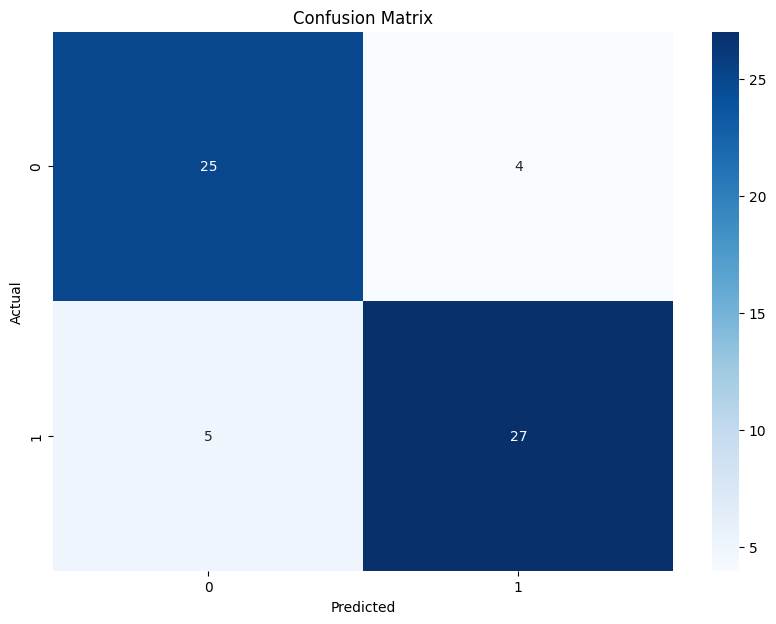

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,7))
plt.title('Confusion Matrix')
sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True, fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [4]:
from sklearn.metrics import roc_curve , roc_auc_score

y_prob = model.predict_proba(X_test)[:,1]

fpr , tpc , thresholds = roc_curve(y_test , y_prob)

auc = roc_auc_score(y_test , y_prob)

print("AUC:" , auc)


AUC: 0.9267241379310345


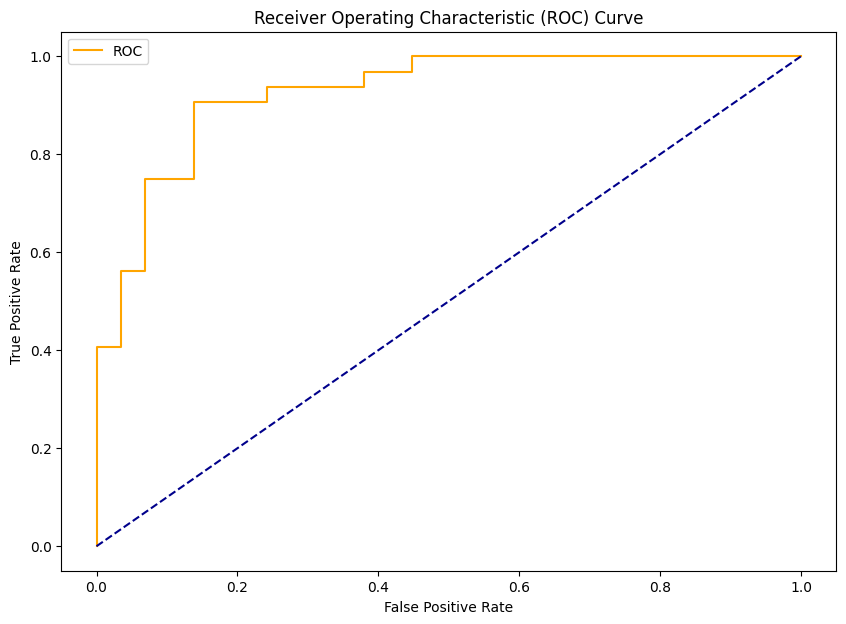

In [5]:
plt.figure = plt.figure(figsize = (10,7))
plt.plot(fpr , tpc , color = 'orange' , label = 'ROC')
plt.plot([0,1] , [0,1] , color = 'darkblue' , linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [6]:
from sklearn.neighbors import KNeighborsClassifier

k_values = list(range(1,26))
result = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_pred = knn.predict(X_test)
    result.append((k , classification_report(y_test , y_pred , output_dict = True)['accuracy']))
    print(f'K={k} , Accuracy = {result[-1][1]}')

K=1 , Accuracy = 0.8524590163934426
K=2 , Accuracy = 0.819672131147541
K=3 , Accuracy = 0.8524590163934426
K=4 , Accuracy = 0.8524590163934426
K=5 , Accuracy = 0.9016393442622951
K=6 , Accuracy = 0.9016393442622951
K=7 , Accuracy = 0.9180327868852459
K=8 , Accuracy = 0.8688524590163934
K=9 , Accuracy = 0.9016393442622951
K=10 , Accuracy = 0.8852459016393442
K=11 , Accuracy = 0.8852459016393442
K=12 , Accuracy = 0.8688524590163934
K=13 , Accuracy = 0.8852459016393442
K=14 , Accuracy = 0.8688524590163934
K=15 , Accuracy = 0.8688524590163934
K=16 , Accuracy = 0.8852459016393442
K=17 , Accuracy = 0.8852459016393442
K=18 , Accuracy = 0.9016393442622951
K=19 , Accuracy = 0.8852459016393442
K=20 , Accuracy = 0.9016393442622951
K=21 , Accuracy = 0.8852459016393442
K=22 , Accuracy = 0.8852459016393442
K=23 , Accuracy = 0.8852459016393442
K=24 , Accuracy = 0.8852459016393442
K=25 , Accuracy = 0.8852459016393442


In [7]:
df_results = pd.DataFrame(result, columns=["k", "Accuracy"])
print(df_results)

     k  Accuracy
0    1  0.852459
1    2  0.819672
2    3  0.852459
3    4  0.852459
4    5  0.901639
5    6  0.901639
6    7  0.918033
7    8  0.868852
8    9  0.901639
9   10  0.885246
10  11  0.885246
11  12  0.868852
12  13  0.885246
13  14  0.868852
14  15  0.868852
15  16  0.885246
16  17  0.885246
17  18  0.901639
18  19  0.885246
19  20  0.901639
20  21  0.885246
21  22  0.885246
22  23  0.885246
23  24  0.885246
24  25  0.885246


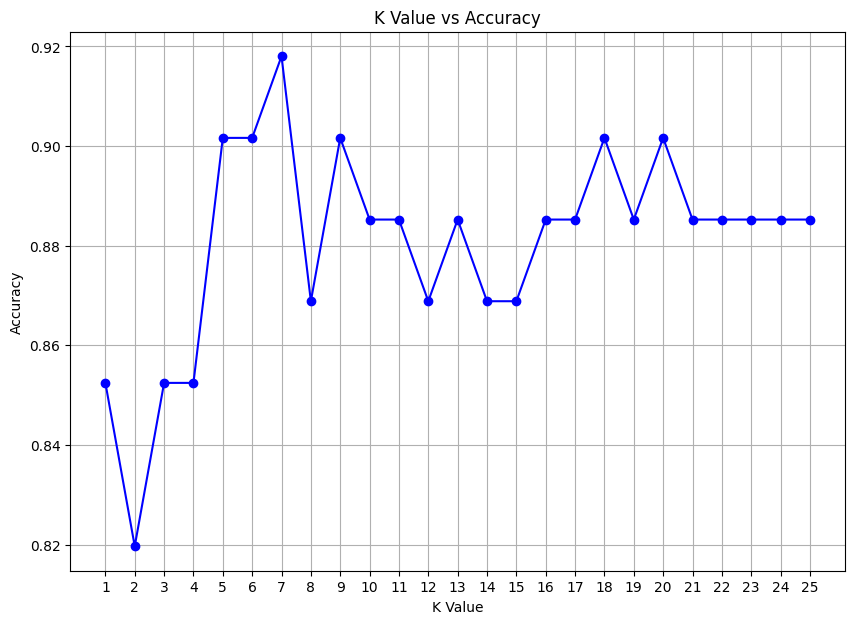

In [8]:
import importlib
import matplotlib
importlib.reload(matplotlib.pyplot)
plt.figure(figsize=(10,7))
plt.plot(df_results["k"], df_results["Accuracy"], marker='o', linestyle='-', color='b')
plt.title('K Value vs Accuracy')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [9]:
roc_auc_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train , y_train)
    y_prob = knn.predict_proba(X_test)[:,1]
    auc = roc_auc_score(y_test , y_prob)
    roc_auc_scores.append((k,auc))
    print(f'k = {k} , Auc = {auc}')

k = 1 , Auc = 0.8545258620689655
k = 2 , Auc = 0.8830818965517242
k = 3 , Auc = 0.8976293103448276
k = 4 , Auc = 0.9143318965517242
k = 5 , Auc = 0.9154094827586208
k = 6 , Auc = 0.9110991379310345
k = 7 , Auc = 0.9326508620689655
k = 8 , Auc = 0.9261853448275861
k = 9 , Auc = 0.919719827586207
k = 10 , Auc = 0.9207974137931034
k = 11 , Auc = 0.9143318965517242
k = 12 , Auc = 0.9035560344827587
k = 13 , Auc = 0.9078663793103448
k = 14 , Auc = 0.9164870689655172
k = 15 , Auc = 0.912176724137931
k = 16 , Auc = 0.9057112068965516
k = 17 , Auc = 0.9067887931034484
k = 18 , Auc = 0.9078663793103448
k = 19 , Auc = 0.9094827586206896
k = 20 , Auc = 0.90625
k = 21 , Auc = 0.9019396551724137
k = 22 , Auc = 0.9014008620689655
k = 23 , Auc = 0.8976293103448276
k = 24 , Auc = 0.8960129310344828
k = 25 , Auc = 0.8938577586206896


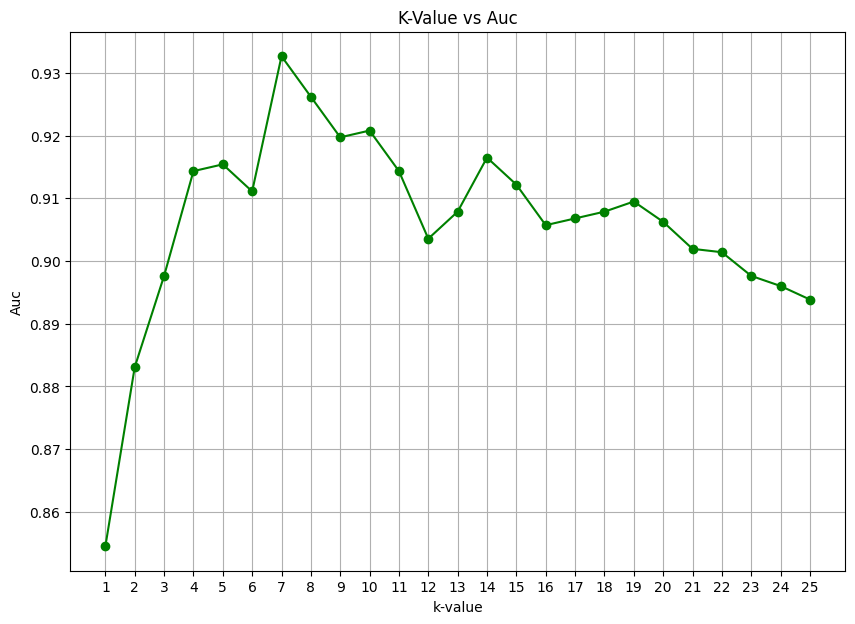

In [10]:
ks = [k for k , auc in roc_auc_scores]
aucs = [auc for k , auc in roc_auc_scores]

plt.figure(figsize=(10,7))
plt.plot(ks , aucs , marker='o', linestyle='-', color='g')
plt.title('K-Value vs Auc')
plt.xlabel('k-value')
plt.ylabel("Auc")
plt.xticks(ks)
plt.grid(True)
plt.show()

                     Accuracy  Precision   Recall        F1       AUC
Logistic Regression  0.852459   0.870968  0.84375  0.857143  0.926724
KNN (k=7)            0.918033   0.935484  0.90625  0.920635  0.932651


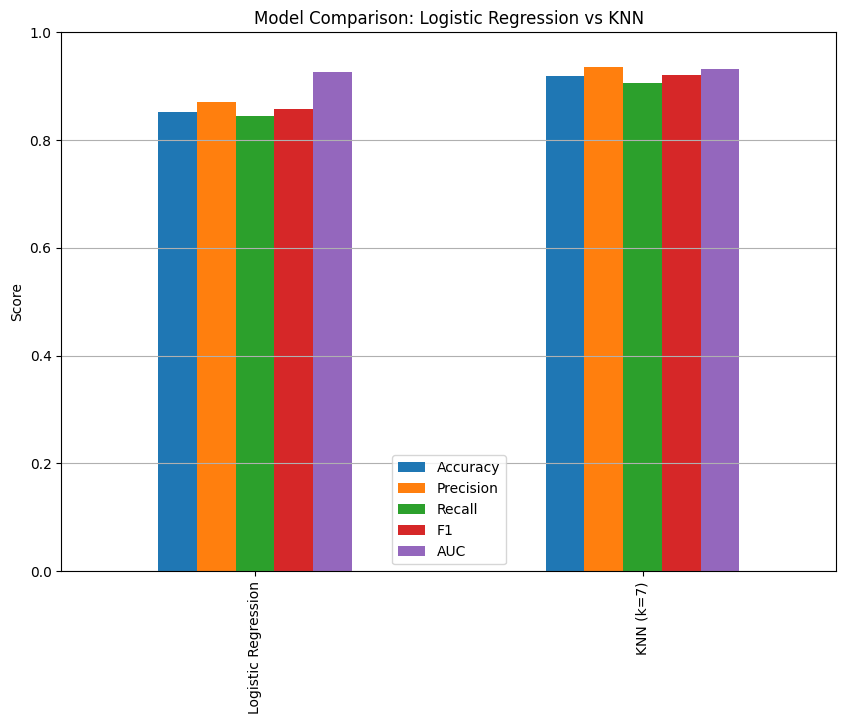

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# ---- Logistic Regression ----
y_pred_log = model.predict(X_test)
y_prob_log = model.predict_proba(X_test)[:, 1]

# ---- KNN (best k = 7) ----
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# ---- Collect Metrics ----
results = {
    "Logistic Regression": {
        "Accuracy": accuracy_score(y_test, y_pred_log),
        "Precision": precision_score(y_test, y_pred_log),
        "Recall": recall_score(y_test, y_pred_log),
        "F1": f1_score(y_test, y_pred_log),
        "AUC": roc_auc_score(y_test, y_prob_log)
    },
    "KNN (k=7)": {
        "Accuracy": accuracy_score(y_test, y_pred_knn),
        "Precision": precision_score(y_test, y_pred_knn),
        "Recall": recall_score(y_test, y_pred_knn),
        "F1": f1_score(y_test, y_pred_knn),
        "AUC": roc_auc_score(y_test, y_prob_knn)
    }
}

# Convert to DataFrame
df_results = pd.DataFrame(results).T
print(df_results)

# ---- Visualization ----
df_results.plot(kind="bar", figsize=(10,7))
plt.title("Model Comparison: Logistic Regression vs KNN")
plt.ylabel("Score")
plt.ylim(0,1)
plt.grid(True, axis="y")
plt.show()

In [12]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(X_train , y_train)
y_pred = dtc.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))




[[25  4]
 [11 21]]
              precision    recall  f1-score   support

           0       0.69      0.86      0.77        29
           1       0.84      0.66      0.74        32

    accuracy                           0.75        61
   macro avg       0.77      0.76      0.75        61
weighted avg       0.77      0.75      0.75        61



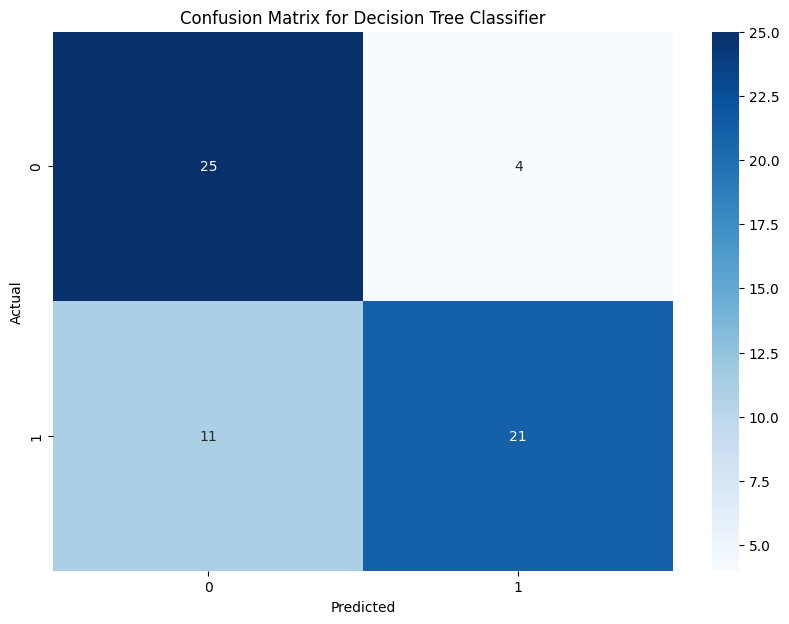

In [13]:
plt.figure(figsize=(10,7))
plt.title('Confusion Matrix for Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True , fmt = 'd' , cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

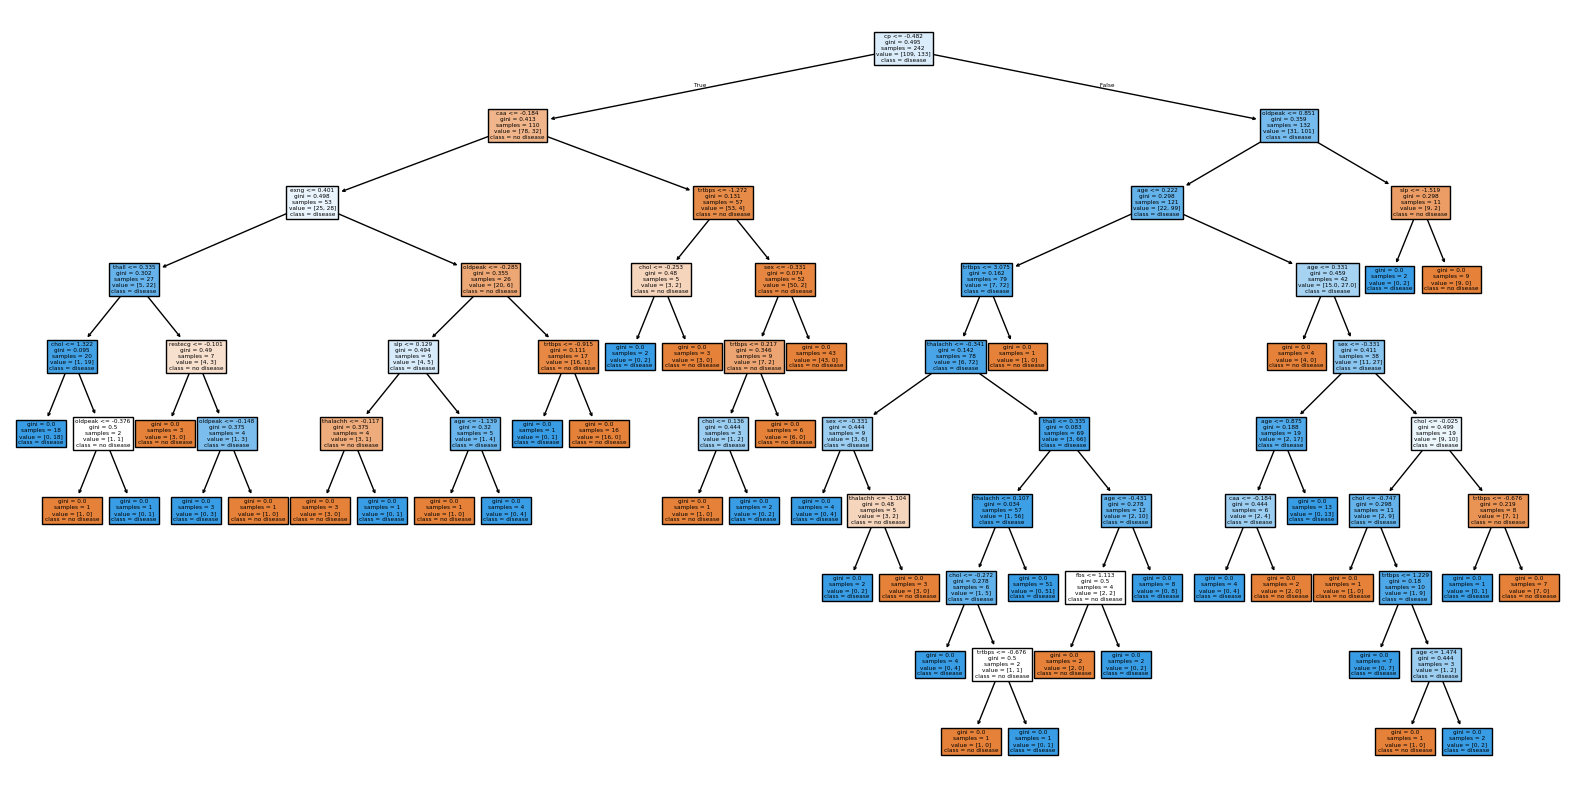

In [14]:
from sklearn import tree
plt.figure(figsize=(20,10))
tree.plot_tree(dtc, filled=True , feature_names = X.columns , class_names = ['no disease' , 'disease'])
plt.show()

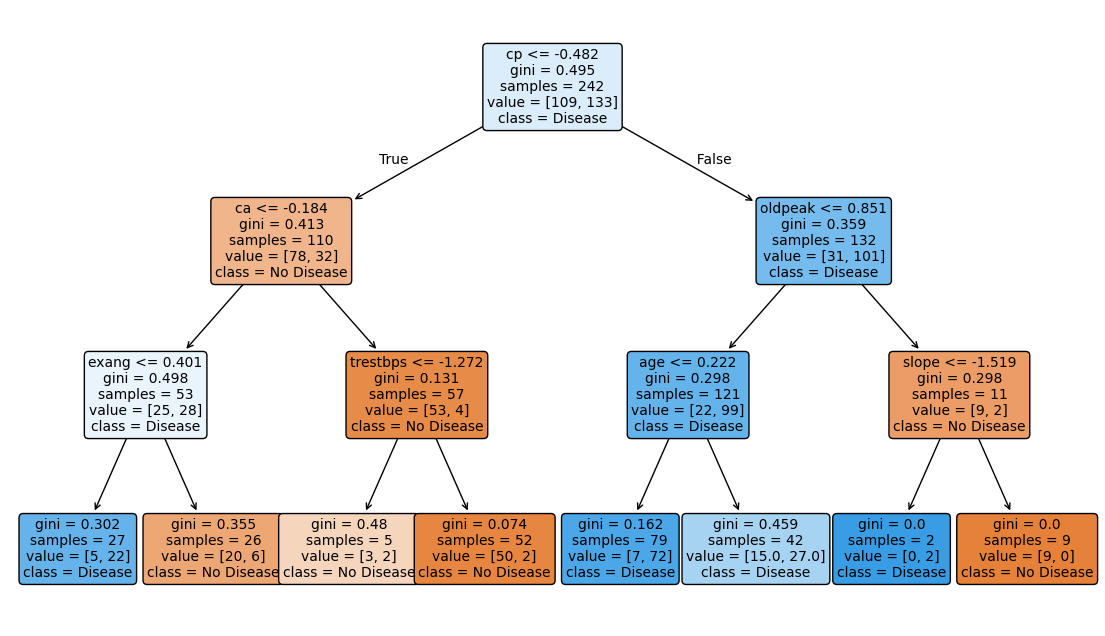

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

feature_names = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal"
]

plt.figure(figsize=(14, 8))
plot_tree(dt,
          filled=True,
          feature_names=feature_names,
          class_names=["No Disease", "Disease"],
          rounded=True,
          fontsize=10)
plt.show()



In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# ---- Decision Tree Classifier ----
for depth in range(1,11):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    y_prob = dt.predict_proba(X_test)[:,1]
    print(f"Max Depth: {depth}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")
    print(f"AUC: {roc_auc_score(y_test, y_prob)}")
    print("-"*30)
# dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
# dt.fit(X_train , y_train)


# train_acc = accuracy_score(y_train , dt.predict(X_train))
# test_acc = accuracy_score(y_test , y_pred)
# print(f'train accuracy: {train_acc}')
# print(f'test accuracy: {test_acc}')


Max Depth: 1
Accuracy: 0.8360655737704918
Precision: 0.8928571428571429
Recall: 0.78125
F1 Score: 0.8333333333333334
AUC: 0.8389008620689655
------------------------------
Max Depth: 2
Accuracy: 0.7868852459016393
Precision: 0.7714285714285715
Recall: 0.84375
F1 Score: 0.8059701492537313
AUC: 0.8879310344827587
------------------------------
Max Depth: 3
Accuracy: 0.819672131147541
Precision: 0.8387096774193549
Recall: 0.8125
F1 Score: 0.8253968253968254
AUC: 0.8588362068965517
------------------------------
Max Depth: 4
Accuracy: 0.8524590163934426
Precision: 0.896551724137931
Recall: 0.8125
F1 Score: 0.8524590163934426
AUC: 0.8432112068965518
------------------------------
Max Depth: 5
Accuracy: 0.819672131147541
Precision: 0.8181818181818182
Recall: 0.84375
F1 Score: 0.8307692307692308
AUC: 0.8426724137931034
------------------------------
Max Depth: 6
Accuracy: 0.8360655737704918
Precision: 0.8666666666666667
Recall: 0.8125
F1 Score: 0.8387096774193549
AUC: 0.8108836206896552
-----

In [17]:
dt2 = DecisionTreeClassifier(max_depth=4, random_state=42)
dt2.fit(X_train , y_train)
y_pred2 = dt2.predict(X_test)
print(confusion_matrix(y_test , y_pred2))

[[26  3]
 [ 6 26]]


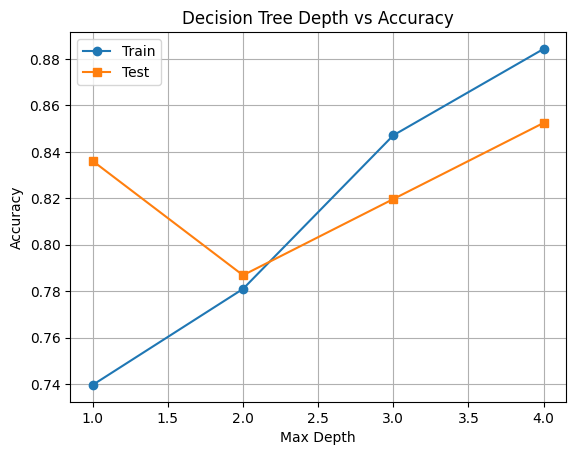

In [18]:
depths = range(1,5)
train_acc, test_acc = [], []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.plot(depths, train_acc, marker='o', label="Train")
plt.plot(depths, test_acc, marker='s', label="Test")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.legend()
plt.grid(True)
plt.show()


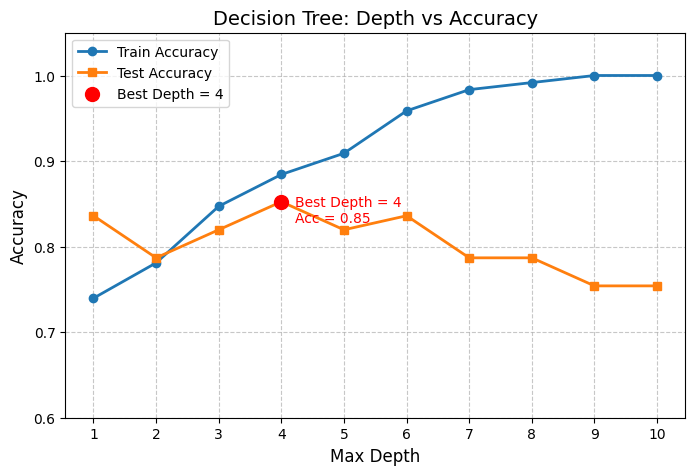

In [19]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

depths = range(1, 11)
train_acc, test_acc = [], []

for d in depths:
    dt = DecisionTreeClassifier(max_depth=d, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

# Find sweet spot (best test accuracy)
best_depth = depths[test_acc.index(max(test_acc))]
best_acc = max(test_acc)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(depths, train_acc, marker='o', label="Train Accuracy", linewidth=2)
plt.plot(depths, test_acc, marker='s', label="Test Accuracy", linewidth=2)

# Highlight best depth
plt.scatter(best_depth, best_acc, color="red", s=100, zorder=5, label=f"Best Depth = {best_depth}")
plt.annotate(f"Best Depth = {best_depth}\nAcc = {best_acc:.2f}",
             (best_depth, best_acc),
             textcoords="offset points",
             xytext=(10, -15),
             ha='left', fontsize=10, color="red")

plt.xlabel("Max Depth", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Decision Tree: Depth vs Accuracy", fontsize=14)
plt.xticks(depths)
plt.ylim(0.6, 1.05)
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfc.fit(X_train , y_train)
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))


[[24  5]
 [ 5 27]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [26]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = rfc.predict_proba(X_test)[:,1]

auc =roc_auc_score(y_test , y_prob)

print("AUC:",auc)

AUC: 0.9224137931034483
